In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('../../data/telecom_churn.csv')

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
#Info About the Dataset with accurate mem usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
#Converting Boolean String to Int(Can be done with get_dummies and sklern Labelling Functions)
#For Simple Labelling this is eassy to do
df['International plan']=df['International plan'].map({"Yes":1,"No":0})
df['Voice mail plan']=df['Voice mail plan'].map({"Yes":1,"No":0})

In [14]:
df['Churn']=df['Churn'].astype('int')

In [16]:
#Drop State Variable from the Main Dataset

states=df.pop('State')

In [18]:
#Remove the Churn Variable from the Main Dataset

y,X=df['Churn'],df.drop('Churn',axis=1)

In [20]:
X.shape

(3333, 18)

In [22]:
#So Here what we are doing is creating the Holdout set based on the Initial Dataset and The Target for that.
#Also here we define the size of the holdout set(Validation Set) and the random State(This can be any Number)
X_train,X_holdout,y_train,y_holdout=train_test_split(X,y,test_size=.3,random_state=11)

In [24]:
X_train.shape,X_holdout.shape,y_train.shape,y_holdout.shape

((2333, 18), (1000, 18), (2333,), (1000,))

In [26]:
"""Fit Predict"""

'Fit Predict'

In [27]:
sample_tree=DecisionTreeClassifier()

In [43]:
sample_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
predictions=sample_tree.predict(X_holdout)

In [45]:
#Prediction Accuracy on the Holdout(Validation Set)
accuracy_score(y_holdout,predictions)

0.921

In [48]:
y_holdout.value_counts(normalize=True),pd.Series(predictions).value_counts(normalize=True)

(0    0.856
 1    0.144
 Name: Churn, dtype: float64, 0    0.869
 1    0.131
 dtype: float64)

In [95]:
#So the No Of params to be tried is the product of the number of values(So here it is 81)
#And this single param will be tried for 5 different Data Splits(CV) So total time that the Tree will train is 405
params_dict={'min_samples_leaf':np.arange(2,11),"max_depth":np.arange(2,11)}

In [96]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=11)

In [97]:
#Here Having a Higher CPU with Multicore will benefit(Some Kind on An Multithreaded operation)
best_tree=GridSearchCV(estimator=sample_tree,param_grid=params_dict,cv=skf,n_jobs=-1,verbose=1)

In [107]:
best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    2.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,

In [100]:
#Can Access the best Estimator(ML Algorithm),Index(Iteration at which we got the best result),score((Highest Metric Score(By Default this is accuracy),classes(Target_Var),cv_results(Give All combinations tested and it's score),best_params(Params on which we trained and got the Highest Metric Score)))

best_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

<h3>CV Assessment after 5 Fold CV (Current Accuracy is around 2.4% Better)</h3>

In [101]:
pred_better=best_tree.predict(X_holdout)
accuracy_score(y_holdout,pred_better)

0.943

In [77]:
#So For kaggle or Other Comps,what we would do is use this Best_tree estimator and use it to predict on our new test set

**Max Depth Parameter Assessment Manually**

In [102]:
accu_depth,holdout_depth=list(),list()
max_depth=np.arange(2,11)
#For each Depth,calculate the Cross Validation Accuracy and the Holdout Set Accuracy
for item in max_depth:
    #New Estimator with the current Depth
    new_tree=DecisionTreeClassifier(random_state=11,max_depth=item)
    val_score=cross_val_score(estimator=new_tree,cv=skf,X=X_train,y=y_train)
    #print(val_score)
    #Here we are doing mean as we are taking the 5 Fold Cross Validation so we get 5 accuracies in return.
    accu_depth.append(val_score.mean())
    #Fit on the Data and then record the prediction with the new Estimator
    new_tree.fit(X_train,y_train)
    new_prediction_holodut=new_tree.predict(X_holdout)
    holdout_depth.append(accuracy_score(y_holdout,new_prediction_holodut))

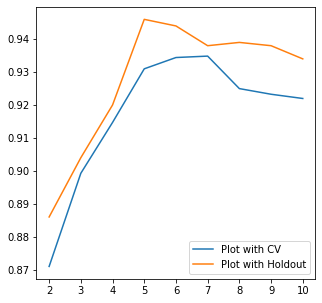

In [103]:
#Plotting Simple x=y plot(Line) for the depth as the X axis and the accuracy as the Y Axis

plt.figure(figsize=(5,5))
plt.plot(max_depth,accu_depth)
plt.plot(max_depth,holdout_depth)
plt.legend(labels=["Plot with CV","Plot with Holdout"])

In [105]:
?export_graphviz

In [109]:
export_graphviz(decision_tree=best_tree.best_estimator_,filled=True,out_file='tree.dot',feature_names=X.columns)